In [1]:
#Importing libraries for dataframe
import numpy as np
import pandas as pd
#Importing warnings to ignore warnings messages
import warnings
warnings.filterwarnings('ignore')
#Importing library for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#Libraries for modelling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn import tree

# for decision tree visualizaiton
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


# for gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# for random search
from sklearn.ensemble import RandomForestClassifier


#### Preprocessing of Data

In [2]:
# Load Data
bidding=pd.read_csv("D:\\kaggle 4\\data\\bids.csv\\bids.csv")

In [3]:
train_data=pd.read_csv("D:\\kaggle 4\\data\\train.csv\\train.csv")

In [4]:
bidding.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [5]:
train_data.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [6]:
#join the data sets
bidjoin = pd.merge(train_data, bidding, on='bidder_id', how='left')


In [7]:
bidjoin.head()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3


In [8]:
#check missing values
pd.isnull(bidjoin).any()

bidder_id          False
payment_account    False
address            False
outcome            False
bid_id              True
auction             True
merchandise         True
device              True
time                True
country             True
ip                  True
url                 True
dtype: bool

In [9]:
#find no of unique values of bid ids
len(bidjoin[pd.isnull(bidjoin['bid_id'])]['bidder_id'].unique())

29

In [10]:
bidjoin[bidjoin['bidder_id'].isin(bidjoin[pd.isnull(bidjoin['bid_id'])]['bidder_id'].unique())]['outcome']


17583      0.0
42424      0.0
129439     0.0
214915     0.0
221776     0.0
226432     0.0
255107     0.0
305088     0.0
333331     0.0
409451     0.0
654549     0.0
657208     0.0
788183     0.0
790914     0.0
794927     0.0
810369     0.0
883351     0.0
1018748    0.0
1019599    0.0
1021349    0.0
1123023    0.0
1139921    0.0
1217466    0.0
1465813    0.0
1482542    0.0
1648201    0.0
1974826    0.0
2139077    0.0
2999380    0.0
Name: outcome, dtype: float64

they are all human when checked the outcome, hence ignoring the data with no details of bids


In [11]:
# dropping the missing value
bid = bidjoin[~bidjoin['bidder_id'].isin(bidjoin[pd.isnull(bidjoin['bid_id'])]['bidder_id'].unique())]

In [12]:
pd.isnull(bid).any()

bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country             True
ip                 False
url                False
dtype: bool

In [13]:
#check missing entries of country column
missratio = pd.isnull(bid['country']).sum()/len(bid)*100
print(f" %0.2f %% observations missing country entry." %
      float(missratio))

 0.09 % observations missing country entry.


In [14]:
#drop null values
bid = bid.dropna()

In [15]:
# double check the missing value
pd.isnull(bid).any()

bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country            False
ip                 False
url                False
dtype: bool

#### Data Exploration

In [16]:
# check the unique number of each feature
print(f"total row in bid:          {len(bid)}")
print(f"total bids in bid:         {len(bid['bid_id'].unique())}")
print(f"total bidder in bids:      {len(bid['bidder_id'].unique())}")
print(f"total payment in bids:     {len(bid['payment_account'].unique())}")
print(f"total address in bids:     {len(bid['address'].unique())}")
print(f"total auction in bids:     {len(bid['auction'].unique())}")
print(f"total merchandise in bids: {len(bid['merchandise'].unique())}")
print(f"total device in bids:      {len(bid['device'].unique())}")
print(f"total country in bids:     {len(bid['country'].unique())}")
print(f"total ip in bids:          {len(bid['ip'].unique())}")
print(f"total url in bids:         {len(bid['url'].unique())}")

total row in bid:          3068523
total bids in bid:         3068523
total bidder in bids:      1983
total payment in bids:     1983
total address in bids:     1983
total auction in bids:     12740
total merchandise in bids: 10
total device in bids:      5726
total country in bids:     198
total ip in bids:          1028810
total url in bids:         663265


In [17]:
a=len(bid[bid['outcome'] == 1])

In [18]:
a

412153

In [19]:
b=len(bid[bid['outcome'] == 0])

In [20]:
print(
    f"total bids made by robots in data set: {a}")
print(
    f"total bids made by human in data set:  {b}")
print(f"the ratio of made by robot vs. bids made by human in data set:{a/b}  ")

total bids made by robots in data set: 412153
total bids made by human in data set:  2656370
the ratio of made by robot vs. bids made by human in data set:0.15515647293110524  


#### Feature Engineering


In [21]:
def entropy(bidjoin):
    """
    Calculate the entropy

    Parameters
    ----------
    data : dataframe
        a DataFrame containing original data

    Returns
    -------
    output: float
        computed entropy 

    Notes
    -----
    entropy is calculated with the following steps:
        1. compute the probabilities
        2. fit in the entropy formula
    """
    entdata = bidjoin.value_counts()/len(bidjoin)  # calculates the probabilities
    # input probabilities to get the entropy
    entropy = scipy.stats.entropy(entdata)
    return entropy

In [22]:
bid = bid.sort_values(by=['time'])
bid['timediffs'] = bid.groupby('bidder_id')['time'].transform(pd.Series.diff)


In [23]:
# number of bids a user made per auction
bids_per_auction = bid.groupby(['auction', 'bidder_id']).size()
bids_per_auction = bids_per_auction.to_frame()


In [24]:
# proportion of bots for each country
pbots_country = bid[bid['outcome'] == 1].groupby(
    'country').size()/bid.groupby('country').size()
pbots_country = pbots_country.fillna(0)
pbots_country = pbots_country.to_frame()


In [25]:
# proportion of bots per device
pbots_device = bid[bid['outcome'] == 1].groupby(
    'device').size()/bid.groupby('device').size()
pbots_device = pbots_device.fillna(0)
pbots_device = pbots_device.to_frame()


In [26]:
# number of unique ip to number of bids ratio
ip_bids_ratio = bid.groupby('bidder_id')['ip'].nunique(
)/bid.groupby('bidder_id')['bid_id'].nunique()
ip_bids_ratio = ip_bids_ratio.to_frame()


In [27]:

# for feature engineering
import time
import datetime
import scipy.stats
# mean per auction url entropy for each user
# Input a pandas series
auction_url_entropy = bid.groupby(['auction', 'bidder_id'])['url'].apply(entropy)
auction_url_entropy = auction_url_entropy.groupby(
    'bidder_id').mean().reset_index()

In [28]:
bid = pd.merge(bid, bids_per_auction, on=['auction', 'bidder_id'], how='left')

In [29]:
bid = pd.merge(bid, pbots_country, on='country', how='left')

In [30]:
bid = pd.merge(bid, pbots_device, on='device', how='left')

In [31]:
bid = pd.merge(bid, ip_bids_ratio, on='bidder_id', how='left')

In [32]:
bid = pd.merge(bid, auction_url_entropy, on='bidder_id', how='left')

In [33]:
bid.shape

(3068523, 18)

In [34]:
# set column names
bid.columns = ['bidder_id', 'payment_account', 'address', 'outcome',
               'bid_id', 'auction', 'merchandise', 'device', 'time', 'country',
               'ip', 'url', 'timediffs', 'bids_per_auction', 'pbots_country', 'pbots_device',
               'ip_bids_ratio', 'auction_url_entropy']

In [35]:
bid = pd.concat([bid.iloc[:, 3], bid.iloc[:, -6:]], axis=1)
bid

,outcome,timediffs,bids_per_auction,pbots_country,pbots_device,ip_bids_ratio,auction_url_entropy
0,0.0,NaN,368,0.089199,0.020161,0.178624,1.463760
1,0.0,NaN,15452,0.177281,0.055360,0.583490,0.885604
2,0.0,NaN,2386,0.095494,0.065255,0.461730,0.809338
3,0.0,NaN,851,0.133801,0.056095,0.196636,1.747853
4,0.0,0.000000e+00,12,0.035496,0.009222,0.196636,1.747853
...,...,...,...,...,...,...,...
3068518,0.0,6.789474e+09,125,0.133801,0.074079,0.745783,1.024255
3068519,1.0,4.736842e+08,71,0.526785,0.459696,0.002967,1.961490
3068520,0.0,1.368421e+09,55,0.133801,0.045936,0.705550,0.994924
3068521,0.0,2.473684e+09,25,0.133801,0.086277,0.710759,0.017290


In [36]:
bid_edit=bid.iloc[:, 1:8]
bid_edit

,timediffs,bids_per_auction,pbots_country,pbots_device,ip_bids_ratio,auction_url_entropy
0,NaN,368,0.089199,0.020161,0.178624,1.463760
1,NaN,15452,0.177281,0.055360,0.583490,0.885604
2,NaN,2386,0.095494,0.065255,0.461730,0.809338
3,NaN,851,0.133801,0.056095,0.196636,1.747853
4,0.000000e+00,12,0.035496,0.009222,0.196636,1.747853
...,...,...,...,...,...,...
3068518,6.789474e+09,125,0.133801,0.074079,0.745783,1.024255
3068519,4.736842e+08,71,0.526785,0.459696,0.002967,1.961490
3068520,1.368421e+09,55,0.133801,0.045936,0.705550,0.994924
3068521,2.473684e+09,25,0.133801,0.086277,0.710759,0.017290


### 2.2 Data visualization
Check whether the new features could help us identify human and robots, plot the distribution of each feature of two different type of bidders.

In [37]:
bots = bid.loc[bid['outcome'] == 1]
human = bid.loc[bid['outcome'] == 0]



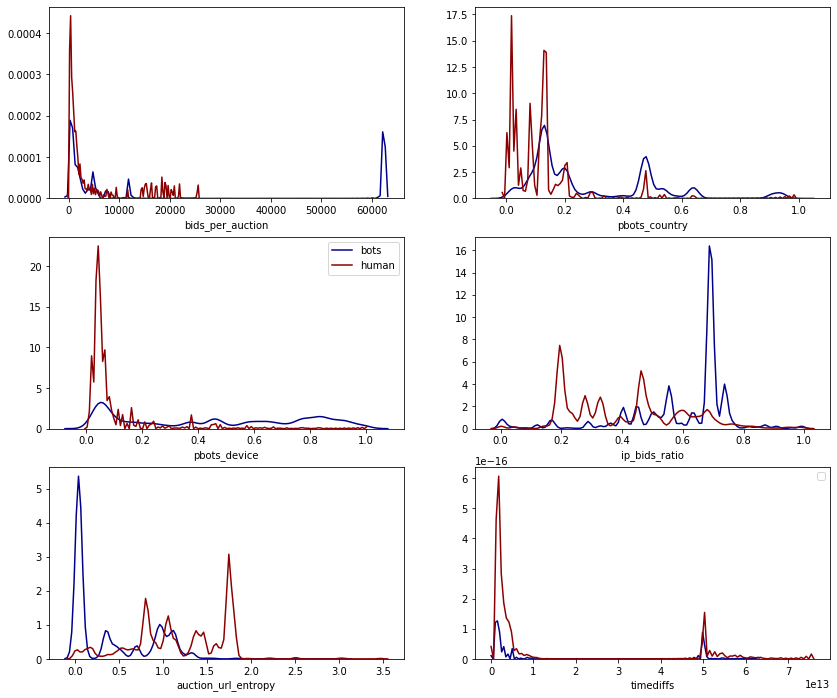

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=False)
sns.distplot(bots['bids_per_auction'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])
sns.distplot(human['bids_per_auction'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])

sns.distplot(bots['pbots_country'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])
sns.distplot(human['pbots_country'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])

sns.distplot(bots['pbots_device'], hist=False, kde=True,
             bins=int(180/5), color='darkblue', label='bots',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])
sns.distplot(human['pbots_device'], hist=False, kde=True,
             bins=int(180/5), color='darkred', label='human',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])

sns.distplot(bots['ip_bids_ratio'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])
sns.distplot(human['ip_bids_ratio'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])
sns.distplot(bots['auction_url_entropy'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])
sns.distplot(human['auction_url_entropy'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])

sns.distplot(bots['timediffs'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 1])
sns.distplot(human['timediffs'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 1])
plt.legend(['bots', 'human'])
plt.show()

Since the variable timediff (time differ per user) showed a similar distribution between robots and human. It also has no clearly correlation with our outcome. Therefore, this variable may not be very helpful when we are fitting a model. In contrast, we may even have overfitting problems if we incorporate it in our models. Therefore, we will ignore the variable timediff during the modeling process.

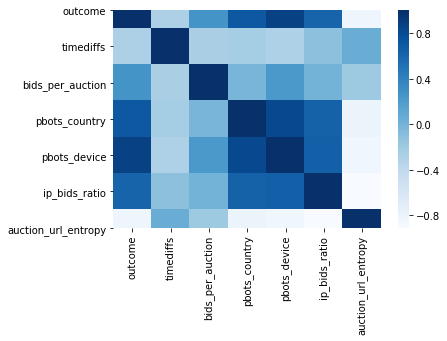

In [39]:
# Plot the correlation matrix for the numerical values
corr_matrix = bid.corr()
sns.heatmap(corr_matrix.corr(),
            xticklabels=corr_matrix.corr().columns,
            yticklabels=corr_matrix.corr().columns,
            cmap="Blues",
            fmt='d')

### Preprocessing Data

### split test and train data

In [40]:
bid_train, bid_test = train_test_split(bid, test_size=0.2)

In [41]:
#Under sampling
bots_train = bid_train.loc[bid_train.outcome == 1]
human_train = bid_train.loc[bid_train.outcome == 0]
human_sample = human_train.sample(n=len(bots_train))
bid_train_balance = pd.concat([bots_train, human_sample])

y_train = bid_train_balance['outcome']
X_train = bid_train_balance.iloc[:, -5:]
y_test = bid_test['outcome']
X_test = bid_test.iloc[:, -5:]


## Modelling

In [42]:
#model accuracy
len(bid[bid['outcome'] == 0])/(len(bid[bid['outcome'] == 0])+len(bid[bid['outcome'] == 1]))

0.8656835878368844

### 1. Decision Tree



In [43]:
# hyperparameter tuning
dt = tree.DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(10, 15),
    'min_samples_split': range(2, 6)
}

dt_cv = GridSearchCV(estimator=dt,
                     param_grid=param_grid,
                     cv=5)
dt_cv.fit(X_train, y_train)
print(dt_cv.best_params_)


{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 13, 'min_samples_split': 2}


In [44]:
# fit the model
# Decision Tree
start_time = time.time()
kwargs_regularize = dict(criterion='gini',
                         max_depth=5,
                         max_leaf_nodes=14,
                         min_samples_split=2)
dt = tree.DecisionTreeClassifier(**kwargs_regularize)
dt.fit(X_train, y_train)

dt_time = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.731046199798584 seconds ---


### Tree Visualisation

In [45]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                feature_names=X_train.columns.values,
                class_names=['human', 'bot'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [47]:
graph

Feature importance of Decision Tree Model


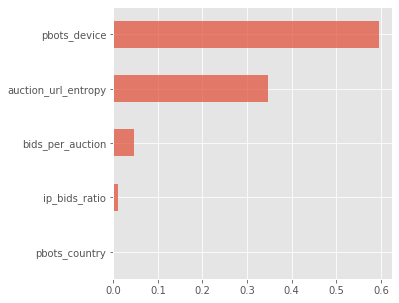

In [48]:
# Check feature importance and display in bar plot.
print('Feature importance of Decision Tree Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('dt_feature.png')

### Evaluation Metric

In [49]:
# predict
y_dt_pred = dt.predict(X_test)

In [50]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_dt_pred, y_test)

0.8393690779772041

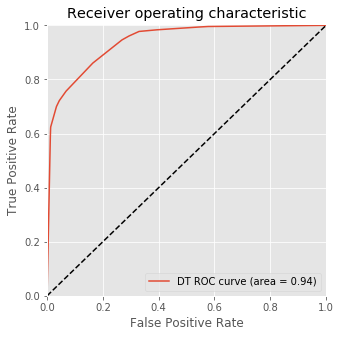

In [51]:
# Plot ROC in one graph
y_dt_score = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _dt = roc_curve(y_test, y_dt_score)
roc_dt_auc = auc(fpr_dt, tpr_dt)

fig = plt.figure(figsize=(5, 5))
plt.plot(fpr_dt, tpr_dt, label='DT ROC curve (area = %0.2f)' % roc_dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_dt_auc.png')

In [52]:
print('Classification Report of Decision Tree Model')
print(classification_report(y_test, y_dt_pred))

Classification Report of Decision Tree Model
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90    531228
         1.0       0.45      0.86      0.59     82477

    accuracy                           0.84    613705
   macro avg       0.71      0.85      0.75    613705
weighted avg       0.90      0.84      0.86    613705



### Random Forest

In [56]:
rf = RandomForestClassifier(n_estimators=50)
param_grid = {
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(8, 12),
    'max_features': ['sqrt', 'auto', 'log2']
}

rf_cv = GridSearchCV(estimator=rf,
                     param_grid=param_grid,
                     cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)


{'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 11}


In [57]:
start_time = time.time()

rf = RandomForestClassifier(n_estimators=100, max_depth=5,
                            max_leaf_nodes=11, max_features='log2',
                            bootstrap=True, oob_score=True)
rf.fit(X_train, y_train)

rf_time = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 41.11504507064819 seconds ---


Feature importance of Random Forest Model


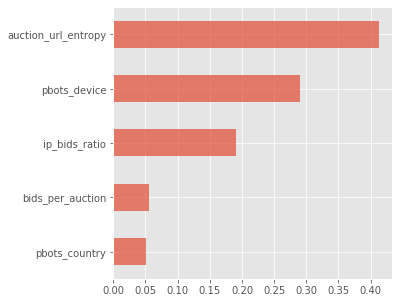

In [58]:

# Check feature importance and display in bar plot.
print('Feature importance of Random Forest Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('rf_feature.png')

In [59]:
y_rf_pred = rf.predict(X_test)
accuracy_score(y_rf_pred, y_test)

0.9219885775739158

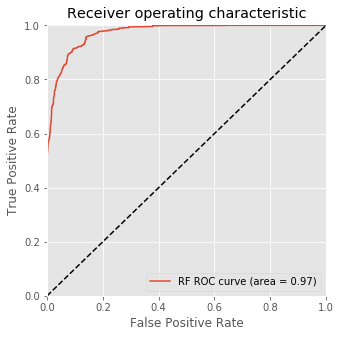

In [60]:
# Plot ROC in one graph
y_rf_score = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test, y_rf_score)
roc_rf_auc = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(5, 5))
plt.plot(fpr_rf, tpr_rf, label='RF ROC curve (area = %0.2f)' % roc_rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_rf_auc.png')

In [61]:
print('Classification Report of Random Forest Model')
print(classification_report(y_test, y_rf_pred))

Classification Report of Random Forest Model
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95    531228
         1.0       0.66      0.86      0.75     82477

    accuracy                           0.92    613705
   macro avg       0.82      0.90      0.85    613705
weighted avg       0.93      0.92      0.93    613705



### 3. Gradient Boosting


In [62]:
gb = GradientBoostingClassifier(n_estimators=10)
param_grid = {
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(8, 11)
}

gb_cv = GridSearchCV(estimator=gb,
                     param_grid=param_grid,
                     cv=5)
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)

{'max_depth': 5, 'max_leaf_nodes': 10}


In [63]:
start_time = time.time()

gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, max_features='sqrt',
                                max_leaf_nodes=9)
gb.fit(X_train, y_train)

gb_time = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 45.57012987136841 seconds ---


Feature importance of Gradient Boosting Model


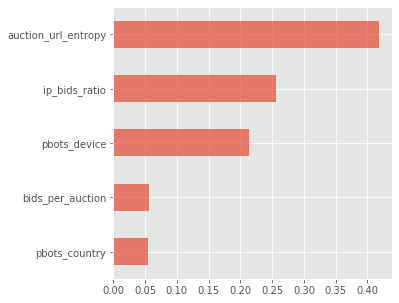

In [64]:
# Check feature importance and display in bar plot.
print('Feature importance of Gradient Boosting Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('gb_feature.png')

In [65]:
y_gb_pred = gb.predict(X_test)
accuracy_score(y_gb_pred, y_test)

0.9766402424617691

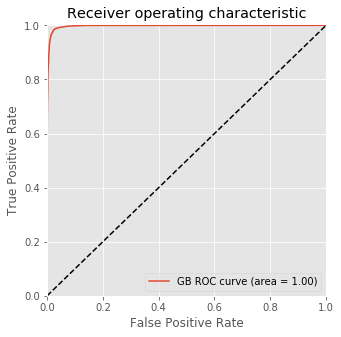

In [66]:
# Plot ROC in one graph
y_gb_score = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _gb = roc_curve(y_test, y_gb_score)
roc_gb_auc = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(5, 5))
plt.plot(fpr_gb, tpr_gb, label='GB ROC curve (area = %0.2f)' % roc_gb_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_gb_auc.png')

In [67]:
print('Classification Report of Gradient Boosting Model')
print(classification_report(y_test, y_gb_pred))

Classification Report of Gradient Boosting Model
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    531228
         1.0       0.86      0.98      0.92     82477

    accuracy                           0.98    613705
   macro avg       0.93      0.98      0.95    613705
weighted avg       0.98      0.98      0.98    613705



#### Compare different models

In [68]:
dt_metrics = [metrics.accuracy_score(y_test, y_dt_pred), metrics.precision_score(y_test, y_dt_pred),
              metrics.recall_score(y_test, y_dt_pred), metrics.f1_score(
                  y_test, y_dt_pred),
              metrics.roc_auc_score(y_test, y_dt_pred), dt_time]
rf_metrics = [metrics.accuracy_score(y_test, y_rf_pred), metrics.precision_score(y_test, y_rf_pred),
              metrics.recall_score(y_test, y_rf_pred), metrics.f1_score(
                  y_test, y_rf_pred),
              metrics.roc_auc_score(y_test, y_rf_pred), rf_time]
gb_metrics = [metrics.accuracy_score(y_test, y_gb_pred), metrics.precision_score(y_test, y_gb_pred),
              metrics.recall_score(y_test, y_gb_pred), metrics.f1_score(
                  y_test, y_gb_pred),
              metrics.roc_auc_score(y_test, y_gb_pred), gb_time]

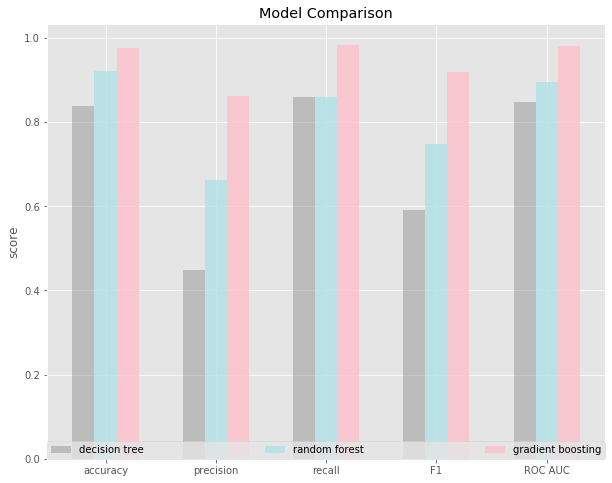

In [69]:
fig, ax = plt.subplots(figsize=(10, 8))
index = np.arange(5)
width = 0.2
b1 = plt.bar(index, dt_metrics[0:5], width,
             alpha=0.4, color='grey', label='decision tree')
b2 = plt.bar(index+width, rf_metrics[0:5], width,
             alpha=0.8, color='powderblue', label='random forest')
b3 = plt.bar(index+2*width, gb_metrics[0:5], width,
             alpha=0.8, color='pink', label='gradient boosting')
plt.title('Model Comparison')
plt.ylabel('score')
plt.xticks(index+width, ('accuracy', 'precision', 'recall', 'F1', 'ROC AUC'))
plt.legend(loc=8, ncol=3, mode="expand", borderaxespad=0.)
plt.show()
fig.savefig('model_comparison.png')

In [70]:
label = ["Accuracy_score", "Precision_score",
         "Recall_Score", "F1_score", "ROC_AUC_score", "Time(s)"]
table = pd.DataFrame({'Decision Tree': dt_metrics,
                      'Random Forest': rf_metrics, 'Gradient Boosting': gb_metrics})
table = table.transpose()
table.columns = label
table.transpose().round(3)

,Decision Tree,Random Forest,Gradient Boosting
Accuracy_score,0.839,0.922,0.977
Precision_score,0.449,0.662,0.862
Recall_Score,0.861,0.858,0.984
F1_score,0.590,0.747,0.919
ROC_AUC_score,0.848,0.895,0.980
Time(s),0.731,41.115,45.570


according to the results, we will go with gradient boosting, and we can conclude that auction url is a determinant of robots, than human.